In [1]:
import cv2
import pickle
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path_current = os.path.dirname(os.path.abspath('__file__'))
sys.path.append(os.path.split(path_current)[0])

from app_sys import AppSys
from utils_predict import standardize_fsize_coord_conversion

app_sys = AppSys()

# Load kp coords

In [3]:
direc = os.path.join(app_sys.PATH_ASSET, 'concept_test')

In [4]:
os.listdir(direc)

['kp.pkl', 'img1.pkl', 'img.pkl', 'img0.pkl', 'kp1.pkl', 'kp0.pkl']

In [5]:
direc_img = pickle.load(open(os.path.join(direc,'img.pkl'), 'rb'))
kp = pickle.load(open(os.path.join(direc,'kp.pkl'), 'rb'))

In [6]:
print(direc_img)
direc_img_depth = direc_img.replace('original', 'depth')
print(direc_img_depth)

/workspaces/MoonClimbers/app/asset/prep_kp/temp/1StarChoss_trimmed_masked_0_original.jpg
/workspaces/MoonClimbers/app/asset/prep_kp/temp/1StarChoss_trimmed_masked_0_depth.jpg


# Load the depth array

In [7]:
depth_array = np.load(os.path.join(app_sys.PATH_ASSET_DEPTH, '1StarChoss_trimmed_depths.npz'))
depth_array

NpzFile '/workspaces/MoonClimbers/app/asset/depth/1StarChoss_trimmed_depths.npz' with keys: depths

In [8]:
depth_array['depths'].shape

(589, 1280, 720)

In [17]:
depth_array['depths'][0,0,0]

2.3925781

# KP coordinates conversion from standardised frame to the original frame

In [9]:
kp_2d = {key: kp.get_node_coords(key) for key in kp.get_node_names()}

In [10]:
kp_2d

{'A1': (182, 358),
 'A4': (182, 326),
 'A8': (182, 279),
 'A11': (184, 237),
 'A14': (181, 190),
 'A18': (181, 119),
 'C4': (211, 327),
 'C6': (212, 303),
 'C9': (215, 264),
 'C12': (216, 223),
 'C14': (218, 192),
 'C18': (223, 122),
 'D1': (225, 359),
 'E18': (259, 122),
 'F1': (251, 362),
 'F4': (254, 332),
 'F8': (263, 281),
 'F11': (266, 241),
 'F14': (269, 195),
 'H14': (307, 197),
 'H18': (315, 126),
 'I1': (292, 365),
 'I4': (300, 331),
 'I6': (305, 309),
 'I9': (309, 271),
 'I11': (317, 243),
 'K1': (321, 364),
 'K4': (327, 332),
 'K8': (338, 285),
 'K11': (347, 245),
 'K14': (354, 198),
 'K18': (368, 129)}

In [11]:
img = cv2.imread(direc_img)
img_depth = cv2.imread(direc_img_depth)

In [12]:
radius = 2
color = (0, 255, 0)  # Green in BGR
thickness = 3  # Circle border thickness

In [13]:
standardize_fsize_coord_conversion(os.path.join(app_sys.PATH_ASSET_DEPTH, '1StarChoss_trimmed_vis.mp4'),640, (0,0))

(-280, 0)

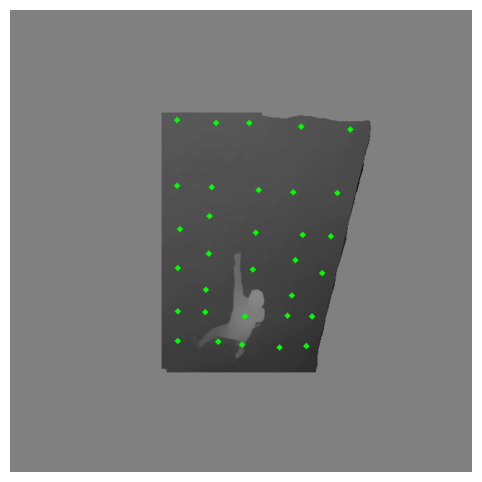

In [20]:
# Dictionary of the depth value
kp_3d = {}
# Draw circles on the image
for k, (xx, yy) in kp_2d.items():
    x, y = standardize_fsize_coord_conversion(os.path.join(app_sys.PATH_ASSET_DEPTH, '1StarChoss_trimmed_vis.mp4'),640, (xx,yy))
    zz = depth_array['depths'][0,y,x]
    kp_3d[k] = (xx,yy,zz)
    cv2.circle(img_depth, (int(xx*640/500), int(yy*640/500)), radius, color, thickness)

# Convert BGR (OpenCV format) to RGB (Matplotlib format)
image_rgb = cv2.cvtColor(img_depth, cv2.COLOR_BGR2RGB)
# resized_image = cv2.resize(image_rgb)

# Display the image
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.axis("off")  # Hide axes
plt.show()

In [21]:
kp_3d

{'A1': (182, 358, 3.4683561),
 'A4': (182, 326, 3.5281072),
 'A8': (182, 279, 3.727693),
 'A11': (184, 237, 3.6829605),
 'A14': (181, 190, 3.8022854),
 'A18': (181, 119, 4.9110045),
 'C4': (211, 327, 3.4756007),
 'C6': (212, 303, 3.5510385),
 'C9': (215, 264, 3.650322),
 'C12': (216, 223, 3.6955874),
 'C14': (218, 192, 3.7946944),
 'C18': (223, 122, 3.981653),
 'D1': (225, 359, 3.3304753),
 'E18': (259, 122, 3.9433594),
 'F1': (251, 362, 3.3301558),
 'F4': (254, 332, 3.4299672),
 'F8': (263, 281, 3.5557444),
 'F11': (266, 241, 3.597577),
 'F14': (269, 195, 3.7252407),
 'H14': (307, 197, 3.7049468),
 'H18': (315, 126, 3.887551),
 'I1': (292, 365, 3.23707),
 'I4': (300, 331, 3.374892),
 'I6': (305, 309, 3.3998806),
 'I9': (309, 271, 3.5110996),
 'I11': (317, 243, 3.5485358),
 'K1': (321, 364, 3.1821613),
 'K4': (327, 332, 3.2714844),
 'K8': (338, 285, 3.416798),
 'K11': (347, 245, 3.539152),
 'K14': (354, 198, 3.6371555),
 'K18': (368, 129, 3.7523468)}

In [26]:
dict_col = {
    'A':'red',
    'C':'orange',
    'D':'yellow',
    'E':'green',
    'F':'green',
    'H':'blue',
    'I':'navy',
    'K':'purple',
    }

Text(0.5, 0, 'Z')

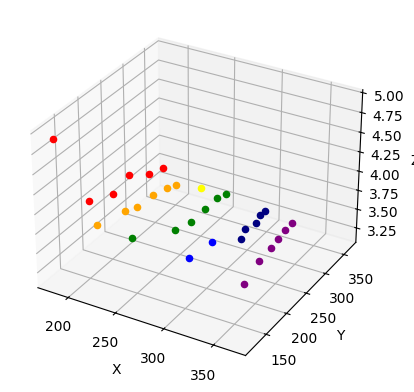

In [29]:
fig = plt.figure()
ax = plt.axes(projection='3d')
for k, coords in kp_3d.items():
    ax.scatter(coords[0], coords[1], coords[2], label=k, c=dict_col[k[0]])
# ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')